# ENGR 1330 – Computational Thinking and Data Science

## Machine Learning

Machine learning (ML) is the process of  building algorithms that are capable of ‘learning’ from data. ML takes a dataset and attempts to fit a model to the data such that the model can make accurate predictions on data that is either unknown or to fill in missing parts of the data. An example of this would be using ML to predict what videos a user might want to watch based on what they viewed previously. 

The purpose of a Machine learning system is to:
- Fit a model to a dataset 
- Use the model to make predictions about the future
- Use the model to fill in missing data 

This project will develop scripts to train a machine learning model. 

### Background
Scikit will be used to generate and train the model along with making the predictions. Scikit is a common machine learning library and is a good place to start learning about machine learning. The model type for this project will be Support Vector Machine (SVM) that takes in a vector with each element of the vector representing a variable. 

To learn more about Scikit SVM models read the documentation found here:
https://scikit-learn.org/stable/modules/svm.html#svm

## Objective(s):
- Train a model using prvided dataset with a 80/20 training/validation split.
- test your model against the validation set
- predict the future

## Presentation
Prepare a 5-8 min presentation that will be given to the class. 
The presentation should include:
- Description of the dataset used
- Histogram of the weights
- A graph of the data and model
- Accuracy of the model when tested against the validation set
- Graph of the data along with the predicted data
- Predict data using an x that you come up with that is not included in the data
- Expect to be asked questions about the data and model as well as what variables played the largest role.

## Submission 
- Your presentation slides, jupyter notebook, and pdf of the jupyter notebook must be submitted BEFORE the your present.

## Libraries 
- numpy
- pandas
- matplotlib
- scikit

## Data
- using statistics and graphs describe your data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/Users/atharvalade/downloads/Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP9G,Snohomish,Arlington,WA,98223,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,39.0,238236288,NaN,PUGET SOUND ENERGY INC,53061052701
1,1N4AZ0CP5G,King,Seattle,WA,98118,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,37.0,182735367,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033011102
2,1N4BZ1CP7K,Thurston,Olympia,WA,98502,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,22.0,142814556,POINT (-102.71236 22.94812),NaN,53067012002
3,5YJ3E1EBXK,Frederick,Frederick,MD,21704,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,114252337,POINT (-77.368491 39.354463),NaN,24021752205
4,5YJ3E1EAXL,King,Bellevue,WA,98008,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,48.0,2075510,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109022,1FTFW1ED1M,King,Black Diamond,WA,98010,2021,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,179256115,POINT (-122.00143 47.30893),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031603
109023,1G1FX6S07H,King,Seattle,WA,98106,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,34.0,125716006,POINT (-122.35186 47.54286),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033010800
109024,1G1RB6S55H,King,Burien,WA,98166,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,34.0,226079178,POINT (-122.349394 47.45507),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027901
109025,1G1FY6S01L,Chelan,Wenatchee,WA,98801,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,12.0,144926463,POINT (-120.336499 47.425146),PUD NO 1 OF CHELAN COUNTY,53007961001


In [2]:
Temp = df.copy()
#taking specific datasets used and storing in temp
Temp = Temp.iloc[:, [5,6,7,8,9,10]]

Temp = Temp[Temp['Electric Range']!= 0]
EV = Temp.copy()
EV

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
1,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
2,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150
3,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220
4,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266
...,...,...,...,...,...,...
109021,2013,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6
109023,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238
109024,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53
109025,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259


In [3]:
#descriptive statistics
EV.describe()

,Model Year,Electric Range
count,74294.000000,74294.000000
mean,2017.547675,133.530945
std,2.594486,98.642802
min,1993.000000,6.000000
25%,2016.000000,33.000000
50%,2018.000000,97.000000
75%,2019.000000,220.000000
max,2023.000000,337.000000


In [4]:
#printing rows and columns
EV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74294 entries, 0 to 109026
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Model Year                                         74294 non-null  int64 
 1   Make                                               74294 non-null  object
 2   Model                                              74294 non-null  object
 3   Electric Vehicle Type                              74294 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  74294 non-null  object
 5   Electric Range                                     74294 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


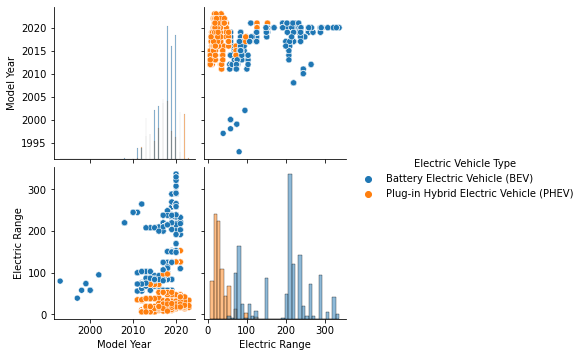

In [5]:
#Scatter plot between all the columns in the dataset using the pairplot() function in the Seaborn library.
sns.pairplot(Temp, hue='Electric Vehicle Type', diag_kind = 'hist')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
EVTLabel = le.fit_transform(EV['Electric Vehicle Type'])
ModelLabel = le.fit_transform(EV['Model Year'])
CAFVLabel = le.fit_transform(EV['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
MakeLabel = le.fit_transform(EV['Make'])

EV["EVT Label"] = EVTLabel
EV["Model Label"] = ModelLabel
EV["CAFV Label"] = CAFVLabel
EV['Make Label'] = MakeLabel

In [7]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74294 entries, 0 to 109026
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Model Year                                         74294 non-null  int64 
 1   Make                                               74294 non-null  object
 2   Model                                              74294 non-null  object
 3   Electric Vehicle Type                              74294 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  74294 non-null  object
 5   Electric Range                                     74294 non-null  int64 
 6   EVT Label                                          74294 non-null  int64 
 7   Model Label                                        74294 non-null  int64 
 8   CAFV Label                                         74294 non-null  int64 
 9   Make Label      

## Machine Learning
- use the code to generate a model
- start by pick data to use as your x and y
- split your data into a training set (80) and a validation set (20)

In [8]:
# split the data into data_train and data_val

columns_x = EV[['Electric Range', 'Model Year']]

x = np.asarray(columns_x)
y = np.asarray(EV['EVT Label'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)
X_test.shape

(14859, 2)

In [9]:
x = X_train
y = y_train

In [10]:
from sklearn import svm
model = svm.SVC(kernel = 'linear', gamma = 'auto', C = 1)
model.fit(x, y)

y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, ..., 0, 0, 1])

In [11]:
YPLabel = le.fit_transform(y_predict)

## Machine Learning Testing
- use a loop to test your model against the validation set you created
- make a graph with a scater plot of the data and a plot of the model

In [12]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_predict)
print('The Accuracy % is:', acc * 100)

The Accuracy % is: 98.20310922673127


In [13]:
#error is 1-accuracy
E = 1 - acc
print('The Error % is:',E*100)

The Error % is: 1.7968907732687223


In [14]:
# use the model to make a prediction about an unknown

model.predict(([[300, 2030]]))

array([0])

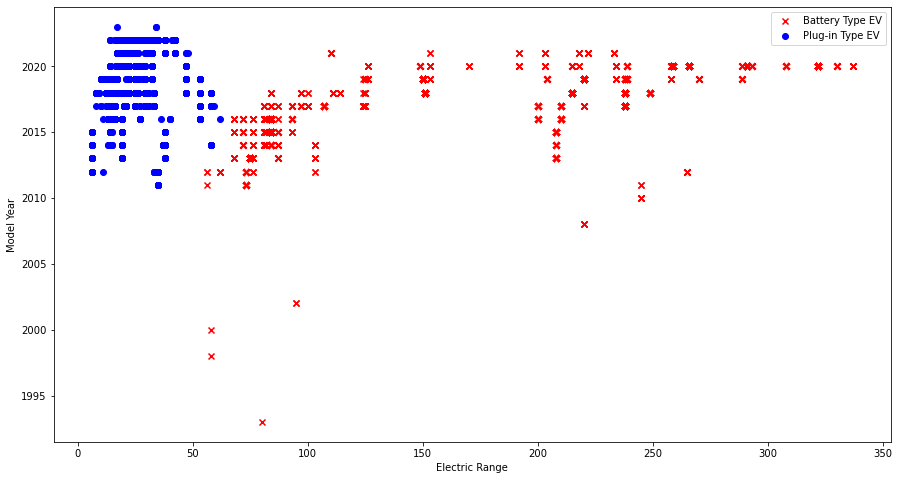

In [15]:
battery_index = np.where(y_predict == 0)
battery_index = battery_index[0].tolist()
plugin_index = np.where(y_predict == 1)
plugin_index = plugin_index[0].tolist()
battery =X_test[battery_index,:]
plugin=X_test[plugin_index,:]

plt.figure(figsize=(15, 8))
plt.xlabel('Electric Range')
plt.ylabel('Model Year')

plt.scatter(battery[:,0],battery[:,1], color='red', marker='x', label='Battery Type EV')
plt.scatter(plugin[:,0],plugin[:,1], color='blue', marker='o', label='Plug-in Type EV') 
plt.legend()


Text(0, 0.5, 'Model Year')

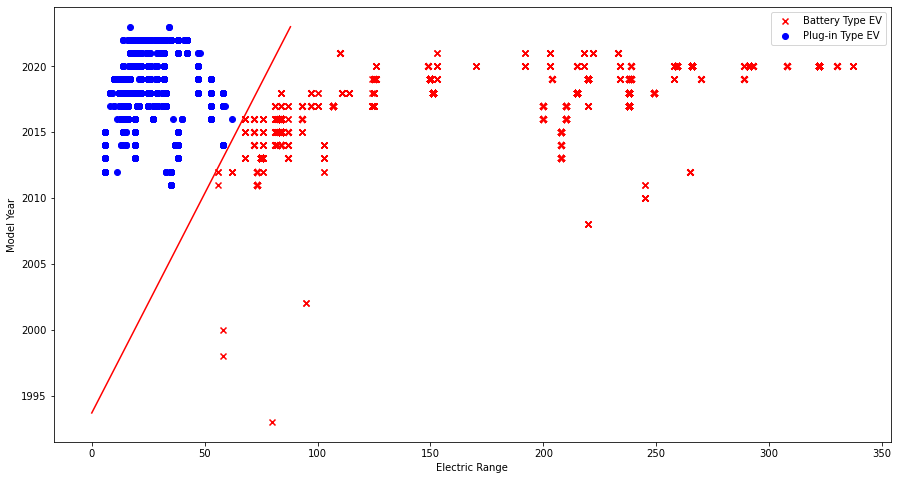

In [16]:
plt.figure(figsize=(15, 8))
# Plotting our two-features-space

            
# Constructing a hyperplane using a formula.
w = model.coef_[0]           # w consists of 2 elements
b = model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(0, 88)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

plt.scatter(battery[:,0],battery[:,1], color='red', marker='x', label='Battery Type EV')
plt.scatter(plugin[:,0],plugin[:,1], color='blue', marker='o', label='Plug-in Type EV') 
plt.legend()

plt.xlabel('Electric Range')
plt.ylabel('Model Year')

**References:**
    
1. https://seaborn.pydata.org/generated/seaborn.pairplot.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
4. https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html